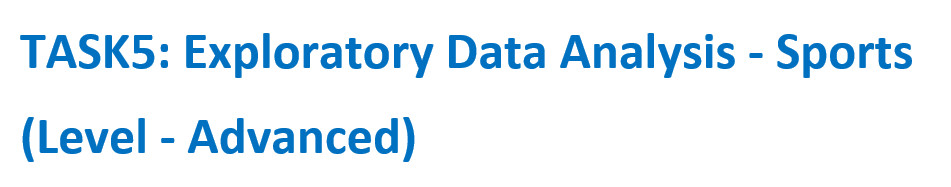

# Import Libraries

In [139]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Data summurizing

In [140]:
data1=pd.read_csv('matches.csv')

In [141]:
data1.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [142]:
data1.shape

(756, 18)

In [143]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [144]:
data1.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,2013.444444,0.025132,13.283069,3.350529
std,3464.478148,3.366895,0.156630,23.471144,3.387963
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,189.750000,2011.000000,0.000000,0.000000,0.000000
50%,378.500000,2013.000000,0.000000,0.000000,4.000000
75%,567.250000,2016.000000,0.000000,19.000000,6.000000
max,11415.000000,2019.000000,1.000000,146.000000,10.000000


In [145]:
data1.isna().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [146]:
data1=data1.drop('umpire3',axis=1)

In [147]:
season_winner= data1.drop_duplicates(subset=['season'], keep='last')[['season', 'winner']].reset_index(drop=True)
season_winner

,season,winner
0,2017,Mumbai Indians
1,2008,Rajasthan Royals
2,2009,Deccan Chargers
3,2010,Chennai Super Kings
4,2011,Chennai Super Kings
5,2012,Kolkata Knight Riders
6,2013,Mumbai Indians
7,2014,Kolkata Knight Riders
8,2015,Mumbai Indians
9,2016,Sunrisers Hyderabad


In [148]:
data1[data1.city.isnull()][['city','venue']]

,city,venue
461,NaN,Dubai International Cricket Stadium
462,NaN,Dubai International Cricket Stadium
466,NaN,Dubai International Cricket Stadium
468,NaN,Dubai International Cricket Stadium
469,NaN,Dubai International Cricket Stadium
474,NaN,Dubai International Cricket Stadium
476,NaN,Dubai International Cricket Stadium


In [149]:
data1['city']=data1['city'].fillna('Dubai')

In [150]:
city_venue = pd.DataFrame(data1.groupby(['city','venue']).count()['season'])
city_venue

season
city           venue                                                     
Abu Dhabi      Sheikh Zayed Stadium                                     7
Ahmedabad      Sardar Patel Stadium, Motera                            12
Bangalore      M Chinnaswamy Stadium                                   66
Bengaluru      M Chinnaswamy Stadium                                    7
               M. Chinnaswamy Stadium                                   7
Bloemfontein   OUTsurance Oval                                          2
Cape Town      Newlands                                                 7
Centurion      SuperSport Park                                         12
Chandigarh     Punjab Cricket Association IS Bindra Stadium, M...      11
               Punjab Cricket Association Stadium, Mohali              35
Chennai        M. A. Chidambaram Stadium                                8
               MA Chidambaram Stadium, Chepauk                         49
Cuttack        Barabati Stadium                                         7
Delhi          Feroz Shah Kotla                                        67
               Feroz Shah Kotla Ground                                  7
Dharamsala     Himachal Pradesh Cricket Association Stadium             9
Dubai          Dubai International Cricket Stadium                      7
Durban         Kingsmead                                               15
East London    Buffalo Park                                             3
Hyderabad      Rajiv Gandhi International Stadium, Uppal               56
               Rajiv Gandhi Intl. Cricket Stadium                       8
Indore         Holkar Cricket Stadium                                   9
Jaipur         Sawai Mansingh Stadium                                  47
Johannesburg   New Wanderers Stadium                                    8
Kanpur         Green Park                                               4
Kimberley      De Beers Diamond Oval                                    3
Kochi          Nehru Stadium                                            5
Kolkata        Eden Gardens                                            77
Mohali         IS Bindra Stadium                                        7
               Punjab Cricket Association IS Bindra Stadium, M...       3
Mumbai         Brabourne Stadium                                       11
               Dr DY Patil Sports Academy                              17
               Wankhede Stadium                                        73
Nagpur         Vidarbha Cricket Association Stadium, Jamtha             3
Port Elizabeth St George's Park                                         7
Pune           Maharashtra Cricket Association Stadium                 21
               Subrata Roy Sahara Stadium                              17
Raipur         Shaheed Veer Narayan Singh International Stadium         6
Rajkot         Saurashtra Cricket Association Stadium                  10
Ranchi         JSCA International Stadium Complex                       7
Sharjah        Sharjah Cricket Stadium                                  6
Visakhapatnam  ACA-VDCA Stadium                                         2
               Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Sta...      11

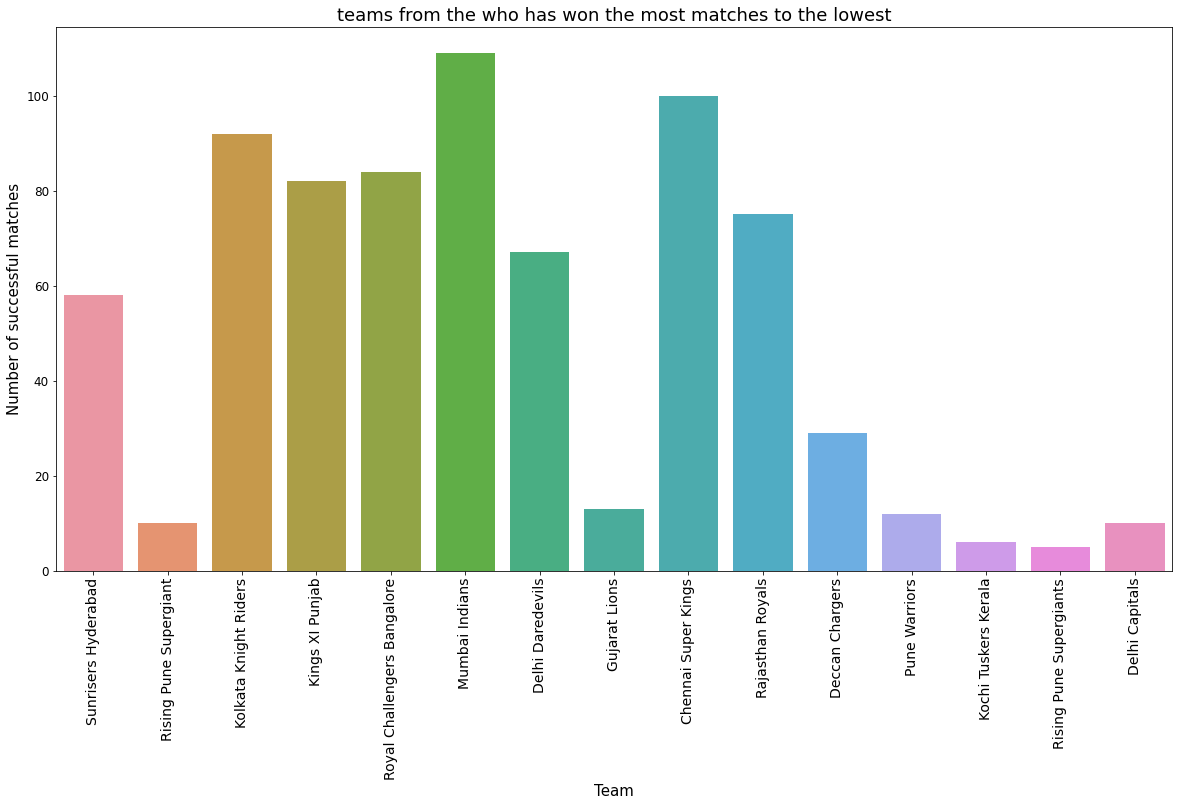

In [151]:
plt.figure(figsize=(20,10))
sns.countplot(x='winner',data=data1)
plt.xticks(rotation=90,fontsize=14)
plt.title('teams from the who has won the most matches to the lowest',size=18)
plt.xlabel('Team',size=15)
plt.ylabel('Number of successful matches',size=15)
plt.show()

C:\Users\nedia\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'Season')

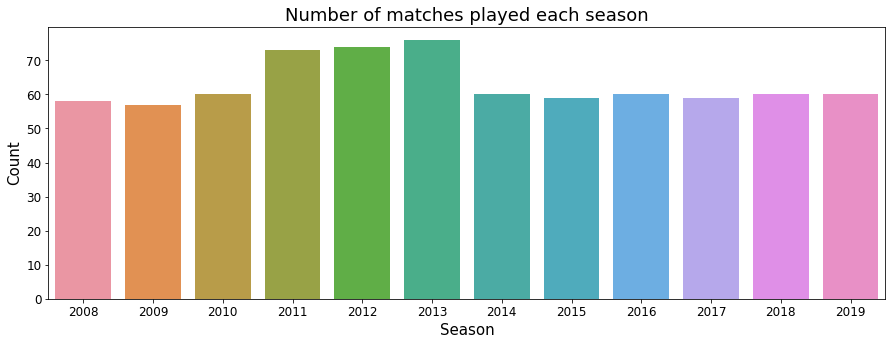

In [153]:
plt.figure(figsize=(15,5))
sns.countplot('season', data =data1)
plt.title('Number of matches played each season',size=18)
plt.ylabel('Count',size=15)
plt.xlabel('Season',size=15)

# players and goals

In [154]:
PlayerOfMatch= data1.groupby('player_of_match')['id'].nunique()
a=PlayerOfMatch.sort_values(ascending=False).head(20) 
a

player_of_match
CH Gayle          21
AB de Villiers    20
MS Dhoni          17
DA Warner         17
RG Sharma         17
YK Pathan         16
SR Watson         15
SK Raina          14
G Gambhir         13
V Kohli           12
AM Rahane         12
MEK Hussey        12
V Sehwag          11
DR Smith          11
AD Russell        11
A Mishra          11
KA Pollard        10
JH Kallis         10
SE Marsh           9
SP Narine          9
Name: id, dtype: int64

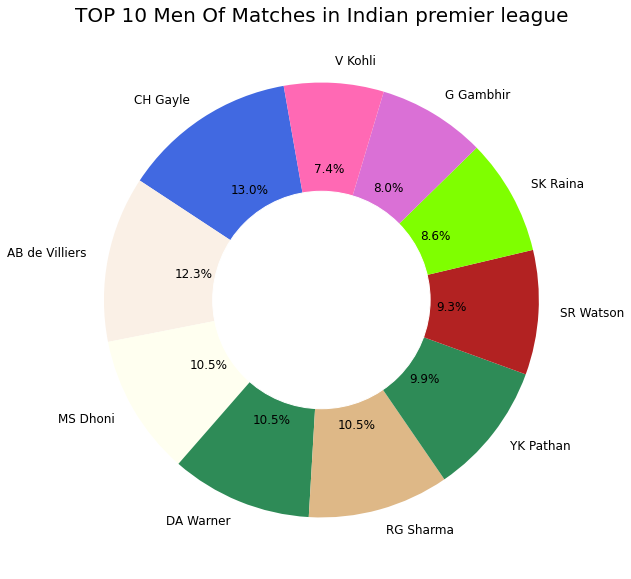

In [155]:
import random
import matplotlib.colors as mcolors
colors = random.choices(list(mcolors.CSS4_COLORS.values()),k = 10)
d = PlayerOfMatch.sort_values(ascending=False).head(10) 
plt.figure(figsize=(10,10))
plt.pie(d, labels=d.index, colors=colors,autopct='%1.1f%%',startangle=100)
central_circle = plt.Circle((0, 0), 0.5, color='white')
fig = plt.gcf()
fig.gca().add_artist(central_circle)
plt.rc('font', size=12)
plt.title("TOP 10 Men Of Matches in Indian premier league", fontsize=20)
plt.show()

In [156]:
data1.groupby('result')['id'].nunique()

result
no result      4
normal       743
tie            9
Name: id, dtype: int64

# total number of matches during all the seasons 

In [157]:
data1.groupby('season')['id'].nunique().sum()

756

In [158]:
d1=pd.DataFrame()
d1['Number of matches']=data1.groupby('team1')['id'].nunique()
d2=pd.DataFrame()
d2['Number of matches']=data1.groupby('team2')['id'].nunique()

In [159]:
d=d1+d2
d['Number of matches'].sort_values(ascending=False) 
d.set_axis(['Total Number of matches played during all the seasons'],axis='columns', inplace=True)
d

,Total Number of matches played during all the seasons
team1,
Chennai Super Kings,164
Deccan Chargers,75
Delhi Capitals,16
Delhi Daredevils,161
Gujarat Lions,30
Kings XI Punjab,176
Kochi Tuskers Kerala,14
Kolkata Knight Riders,178
Mumbai Indians,187


# Win by Runs vs Win by Wickets

In [160]:
#win_by_runs
df = data1[data1.win_by_runs != 0]
df.groupby('win_by_runs')['id'].nunique().sum()

337

In [161]:
#win_by_wickets
df = data1[data1.win_by_wickets != 0]
df.groupby('win_by_wickets')['id'].nunique().sum()

406

# Toss decision

In [162]:
data1['toss_decision'].value_counts()

field    463
bat      293
Name: toss_decision, dtype: int64

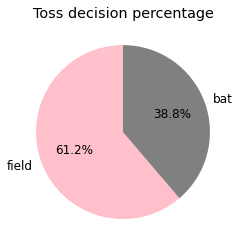

In [163]:
toss= data1.toss_decision.value_counts()
labels = (np.array(toss.index))
sizes = (np.array((toss / toss.sum())*100))
colors = ['pink', 'grey']
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=False, startangle=90)
plt.title("Toss decision percentage")
plt.show()


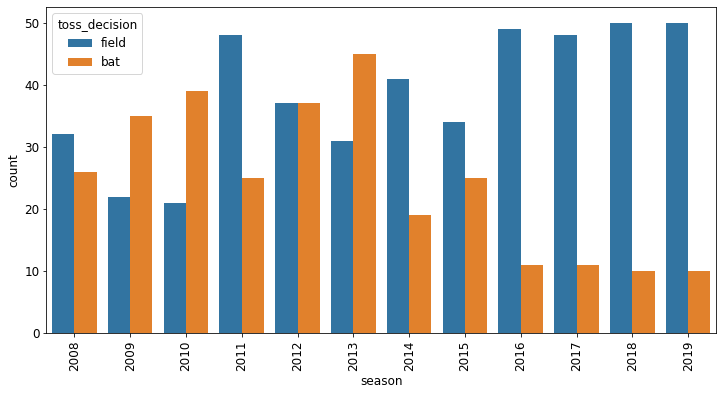

In [164]:
plt.figure(figsize=(12,6))
sns.countplot(x='season', hue='toss_decision', data=data1)
plt.xticks(rotation='vertical')
plt.show()

In [165]:
data2=pd.read_csv('deliveries.csv')

In [166]:
data2.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [167]:
data2.tail()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
179073,11415,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,SR Watson,SL Malinga,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
179074,11415,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,RA Jadeja,SL Malinga,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
179075,11415,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,RA Jadeja,SL Malinga,0,...,0,0,0,0,1,0,1,SR Watson,run out,KH Pandya
179076,11415,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,RA Jadeja,SL Malinga,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
179077,11415,2,Chennai Super Kings,Mumbai Indians,20,6,SN Thakur,RA Jadeja,SL Malinga,0,...,0,0,0,0,0,0,0,SN Thakur,lbw,NaN


In [168]:
data2.shape

(179078, 21)

In [169]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

In [170]:
data2.describe()

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
count,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000
mean,1802.252957,1.482952,10.162488,3.615587,0.000452,0.036721,0.004936,0.021136,0.004183,0.000056,1.246864,0.067032,1.313897
std,3472.322805,0.502074,5.677684,1.806966,0.021263,0.251161,0.116480,0.194908,0.070492,0.016709,1.608270,0.342553,1.605422
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,190.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,379.000000,1.000000,10.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,567.000000,2.000000,15.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,11415.000000,5.000000,20.000000,9.000000,1.000000,5.000000,4.000000,5.000000,5.000000,5.000000,7.000000,7.000000,10.000000


# Player Dismissed 

In [171]:
data2.dropna(subset = ['player_dismissed'], inplace=True)
data2['player_dismissed'].unique()

array(['DA Warner', 'S Dhawan', 'MC Henriques', 'Yuvraj Singh',
       'Mandeep Singh', 'CH Gayle', 'KM Jadhav', 'TM Head', 'Sachin Baby',
       'STR Binny', 'SR Watson', 'S Aravind', 'TS Mills', 'YS Chahal',
       'PA Patel', 'RG Sharma', 'JC Buttler', 'AT Rayudu', 'KH Pandya',
       'N Rana', 'KA Pollard', 'TG Southee', 'MA Agarwal', 'AM Rahane',
       'BA Stokes', 'JJ Roy', 'BB McCullum', 'AJ Finch', 'KD Karthik',
       'SPD Smith', 'MS Dhoni', 'DT Christian', 'M Vohra', 'WP Saha',
       'HM Amla', 'AR Patel', 'Vishnu Vinod', 'P Negi', 'AP Tare',
       'KK Nair', 'SW Billings', 'SV Samson', 'CH Morris',
       'CR Brathwaite', 'PJ Cummins', 'RR Pant', 'S Nadeem', 'SK Raina',
       'DR Smith', 'DS Kulkarni', 'G Gambhir', 'RV Uthappa', 'CA Lynn',
       'YK Pathan', 'SA Yadav', 'CR Woakes', 'SP Narine', 'RA Tripathi',
       'F du Plessis', 'R Bhatia', 'DL Chahar', 'A Zampa', 'AB Dinda',
       'DJ Hooda', 'BCJ Cutting', 'V Shankar', 'NV Ojha', 'Rashid Khan',
       'MP Stoini

Text(0.5, 1.0, 'Top 10 Bowlers')

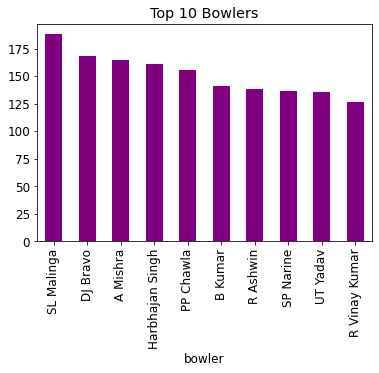

In [172]:
data2.groupby('bowler')['player_dismissed'].count().sort_values(ascending=False).head(10).plot(kind='bar', color='purple')
plt.title("Top 10 Bowlers")

In [173]:
data2['inning'].value_counts()

1    4604
2    4216
3       9
4       5
Name: inning, dtype: int64

# Run types distribution

In [174]:
runs=pd.DataFrame([['wide_runs',data2.groupby('wide_runs')['match_id'].nunique().sum()], 
                           ['bye_runs',data2.groupby('bye_runs')['match_id'].nunique().sum()], 
                           ['legbye_runs',data2.groupby('legbye_runs')['match_id'].nunique().sum()],
                           ['noball_runs',data2.groupby('noball_runs')['match_id'].nunique().sum()],
                           ['penalty_runs',data2.groupby('penalty_runs')['match_id'].nunique().sum()],
                           ['batsman_runs',data2.groupby('batsman_runs')['match_id'].nunique().sum()],
                           ['extra_runs',data2.groupby('extra_runs')['match_id'].nunique().sum()]],
                           index=[0,1,2,3,4,5,6], 
                           columns=['Runs Type', 'Total'])

In [175]:
runs

,Runs Type,Total
0,wide_runs,785
1,bye_runs,756
2,legbye_runs,761
3,noball_runs,759
4,penalty_runs,756
5,batsman_runs,992
6,extra_runs,793


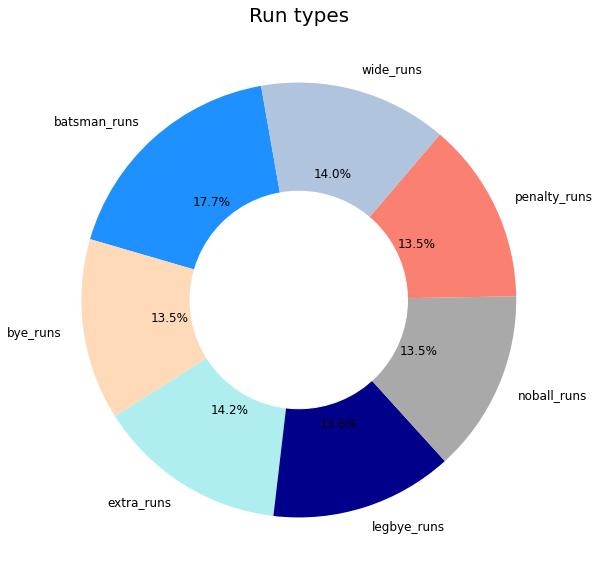

In [178]:
import random
import matplotlib.colors as mcolors
colors = random.choices(list(mcolors.CSS4_COLORS.values()),k = 10)
d = runs.groupby("Runs Type")["Total"].sum().head(10)
plt.figure(figsize=(10,10))
plt.pie(d, labels=d.index, colors=colors,autopct='%1.1f%%',startangle=100)
central_circle = plt.Circle((0, 0), 0.5, color='white')
fig = plt.gcf()
fig.gca().add_artist(central_circle)
plt.rc('font', size=12)
plt.title("Run types", fontsize=20)
plt.show()